## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [2]:
# ваш код здесь
df.drop('State', axis=1, inplace=True)

In [3]:
#df['International plan'] = df.apply(lambda x: 1 if x['International plan'] == 'Yes' else 0, axis=1)
#df['Voice mail plan'] = df.apply(lambda x: 1 if x['Voice mail plan'] == 'Yes' else 0, axis=1)

In [4]:
# df['Churn'] = df.apply(lambda x: 1 if x['Churn'] == 'True' else 0, axis=1)

In [5]:
# более эффективный код
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [6]:
df['Churn'] = df['Churn'].map({True: 1, False: 0})

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [7]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
# ваш код здесь

Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [9]:
# ваш код здесь
X = df.drop('Churn', axis=1)
y = df['Churn']
X.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Проверьте баланс классов. Является ли выборка сбалансированной?

In [10]:
# ваш код здесь
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

**Вывод**: выборка не является сбалансированной, преобладает класс 0

In [11]:
y.describe()

count    3333.000000
mean        0.144914
std         0.352067
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churn, dtype: float64

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [12]:
from sklearn.model_selection import train_test_split

# ваш код здесь
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=123)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [13]:
from sklearn.preprocessing import StandardScaler

# ваш код здесь
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [14]:
# применяем трансформацию
X_train_norm = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
X_test_norm = pd.DataFrame(scaler.transform(Xtest), columns=Xtest.columns)

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [15]:
# ваш код здесь

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ваш код здесь
# Логистическая регрессия 
logreg = LogisticRegression()
logreg.fit(X_train_norm, ytrain)

# SV классификаиор
svc=SVC(kernel='linear', probability=True)
svc.fit(X_train_norm, ytrain)

SVC(kernel='linear', probability=True)

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [17]:
from sklearn.metrics import roc_auc_score

# ваш код здесь
# Предсказания на тесте
logreg_pred = logreg.predict(X_test_norm)
logreg_proba = logreg.predict_proba(X_test_norm)[:, 1]

In [18]:
svc_pred = svc.predict(X_test_norm)
svc_proba = svc.predict_proba(X_test_norm)[:,1]

In [19]:
print('logreg: roc_auc_score=',roc_auc_score(ytest, logreg_proba))

logreg: roc_auc_score= 0.823696184205991


In [20]:
print('svc: roc_auc_score=',roc_auc_score(ytest, svc_proba))

svc: roc_auc_score= 0.7948192065078763


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [21]:
from sklearn.tree import DecisionTreeClassifier

# ваш код здесь
dectree = DecisionTreeClassifier()
dectree.fit(X_train_norm, ytrain)

dectree_proba = dectree.predict_proba(X_test_norm)[:,1]

In [22]:
print('decisiontree: roc_auc_score=',roc_auc_score(ytest, dectree_proba))

decisiontree: roc_auc_score= 0.8419564992589018


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [23]:
# ваш код здесь
Xtrain_noscale, Xtest_noscale, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=123)

In [24]:
dectree2 = DecisionTreeClassifier()
dectree2.fit(Xtrain_noscale, ytrain)

dectree2_proba = dectree2.predict_proba(Xtest_noscale)[:,1]

In [25]:
print('decisiontree2 no scale: roc_auc_score=',roc_auc_score(ytest, dectree2_proba))

decisiontree2 no scale: roc_auc_score= 0.84368860087553


**Вывод**: как и ожидалось, для решающих деревьев не требуется делать нормализацию признаков. Так как пороги одних признаков не зависят от других признаков.

Какой вывод про масштабирование признаков для обучения дерева можно сделать?

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

**сначала логистическая регрессия**

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

# ваш код здесь
# Логистическая регрессия 
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

# Сетка гиперпараметров
param_grid = {
    'C': np.arange(0.1, 10.1, 1.0),  # 20 значений от 0.1 до 10    
    'penalty': ['l1', 'l2']
}

# Подбор через GridSearchCV
logreg_grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='roc_auc',   # оптимизация по roc_auc 
    cv=5,
    n_jobs=-1
)

logreg_grid.fit(X_train_norm, ytrain)

best_logreg_model = logreg_grid.best_estimator_
print(best_logreg_model)

# Результаты подбора
print("Лучшие параметры:", logreg_grid.best_params_)
print("Лучший F1 на CV:", logreg_grid.best_score_)

# Предсказания на тесте
logreg_pred = logreg_grid.predict(X_test_norm)
logreg_proba = logreg_grid.predict_proba(X_test_norm)[:, 1]

# Метрики
print("\nМетрики на тесте:")
print("Precision:", precision_score(ytest, logreg_pred))
print("Recall:", recall_score(ytest, logreg_pred))
print("F1-score:", f1_score(ytest, logreg_pred))
print("ROC-AUC:", roc_auc_score(ytest, logreg_proba))

# Полный отчёт
print("\nClassification report:")
print(classification_report(ytest, logreg_pred))

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')
Лучшие параметры: {'C': 0.1, 'penalty': 'l1'}
Лучший F1 на CV: 0.8108052125049168

Метрики на тесте:
Precision: 0.5306122448979592
Recall: 0.19402985074626866
F1-score: 0.28415300546448086
ROC-AUC: 0.8268243080210954

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       866
           1       0.53      0.19      0.28       134

    accuracy                           0.87      1000
   macro avg       0.71      0.58      0.61      1000
weighted avg       0.84      0.87      0.84      1000



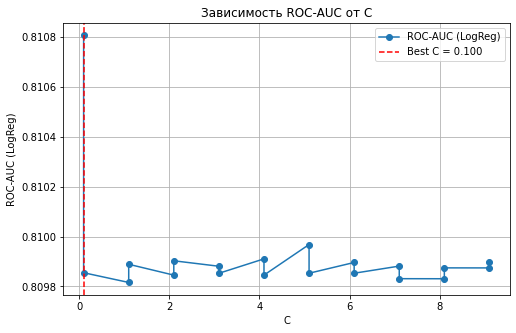

In [27]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Достаём результаты из GridSearchCV
C_values = logreg_grid.cv_results_['param_C'].data.astype(float)  # значения C
roc_auc_scores = logreg_grid.cv_results_['mean_test_score']       # средний ROC-AUC на CV

# Рисуем график
plt.figure(figsize=(8, 5))
plt.plot(C_values, roc_auc_scores, marker='o', label='ROC-AUC (LogReg)')
plt.axvline(logreg_grid.best_params_['C'], color='r', linestyle='--', label=f"Best C = {logreg_grid.best_params_['C']:.3f}")

plt.xlabel("C")
plt.ylabel("ROC-AUC (LogReg)")
plt.title("Зависимость ROC-AUC от C")
plt.grid(True)
plt.legend()
plt.show()


**теперь метод опорных векторов - SVC**

In [28]:
# SVC — поиск лучших параметров
svc = SVC(class_weight='balanced', probability=True, kernel='linear')  # balanced — при дисбалансе классов

# Сетка гиперпараметров
param_grid = {
    'C': np.arange(0.1, 10.1, 1.0)  # 20 значений от 0.1 до 10    
}

# Подбор через GridSearchCV
svc_grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='roc_auc',   # оптимизация по roc_auc 
    cv=5,
    n_jobs=-1
)

svc_grid.fit(X_train_norm, ytrain)

best_svc_model = svc_grid.best_estimator_
print(best_svc_model)

# Результаты подбора
print("Лучшие параметры:", svc_grid.best_params_)
print("Лучший F1 на CV:", svc_grid.best_score_)

# Предсказания на тесте
svc_pred = svc_grid.predict(X_test_norm)
svc_proba = svc_grid.predict_proba(X_test_norm)[:, 1]

# Метрики
print("\nМетрики на тесте:")
print("Precision:", precision_score(ytest, svc_pred))
print("Recall:", recall_score(ytest, svc_pred))
print("F1-score:", f1_score(ytest, svc_pred))
print("ROC-AUC:", roc_auc_score(ytest, svc_proba))

# Полный отчёт
print("\nClassification report:")
print(classification_report(ytest, svc_pred))

SVC(C=0.1, class_weight='balanced', kernel='linear', probability=True)
Лучшие параметры: {'C': 0.1}
Лучший F1 на CV: 0.8148944496042295

Метрики на тесте:
Precision: 0.33125
Recall: 0.7910447761194029
F1-score: 0.46696035242290757
ROC-AUC: 0.8272724139119645

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       866
           1       0.33      0.79      0.47       134

    accuracy                           0.76      1000
   macro avg       0.65      0.77      0.66      1000
weighted avg       0.87      0.76      0.79      1000



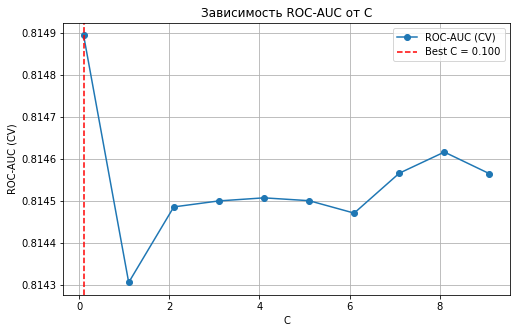

In [29]:
# Достаём результаты из GridSearchCV
C_values = svc_grid.cv_results_['param_C'].data.astype(float)  # значения C
roc_auc_scores = svc_grid.cv_results_['mean_test_score']       # средний ROC-AUC на CV

# Рисуем график
plt.figure(figsize=(8, 5))
plt.plot(C_values, roc_auc_scores, marker='o', label='ROC-AUC (CV)')
plt.axvline(svc_grid.best_params_['C'], color='r', linestyle='--', label=f"Best C = {svc_grid.best_params_['C']:.3f}")

plt.xlabel("C")
plt.ylabel("ROC-AUC (CV)")
plt.title("Зависимость ROC-AUC от C")
plt.grid(True)
plt.legend()
plt.show()

**решающее дерево**

In [30]:
# DecisionTree — поиск лучших параметров
dectree = DecisionTreeClassifier()

# Сетка гиперпараметров
param_grid = {
    'max_depth' : np.arange(1, 11),
    'criterion' : ['gini', 'entropy']
}

# Подбор через GridSearchCV
dectree_grid = GridSearchCV(
    estimator=dectree,
    param_grid=param_grid,
    scoring='roc_auc',   # оптимизация по roc_auc 
    cv=5,
    n_jobs=-1
)

dectree_grid.fit(X_train_norm, ytrain)

best_dectree_model = dectree_grid.best_estimator_
print(best_dectree_model)

# Результаты подбора
print("Лучшие параметры:", dectree_grid.best_params_)
print("Лучший F1 на DTree:", dectree_grid.best_score_)

# Предсказания на тесте
dectree_pred = dectree_grid.predict(X_test_norm)
dectree_proba = dectree_grid.predict_proba(X_test_norm)[:, 1]

# Метрики
print("\nМетрики на тесте:")
print("Precision:", precision_score(ytest, dectree_pred))
print("Recall:", recall_score(ytest, dectree_pred))
print("F1-score:", f1_score(ytest, dectree_pred))
print("ROC-AUC:", roc_auc_score(ytest, dectree_proba))

# Полный отчёт
print("\nClassification report:")
print(classification_report(ytest, dectree_pred))

DecisionTreeClassifier(max_depth=5)
Лучшие параметры: {'criterion': 'gini', 'max_depth': 5}
Лучший F1 на DTree: 0.8790979064073469

Метрики на тесте:
Precision: 0.811965811965812
Recall: 0.7089552238805971
F1-score: 0.756972111553785
ROC-AUC: 0.8671150598049014

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       866
           1       0.81      0.71      0.76       134

    accuracy                           0.94      1000
   macro avg       0.88      0.84      0.86      1000
weighted avg       0.94      0.94      0.94      1000



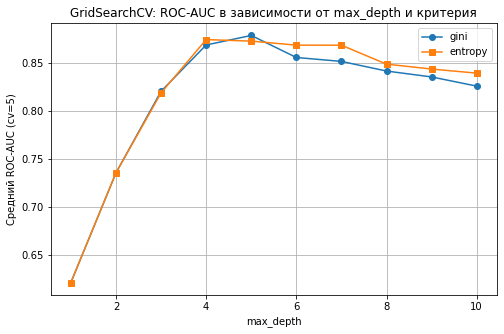

In [31]:
# Достаём результаты из GridSearchCV
results = dectree_grid.cv_results_

# Значения max_depth
max_depths = param_grid['max_depth']

# Создаём массив для хранения средних ROC-AUC для каждой комбинации criterion
mean_scores_gini = []
mean_scores_entropy = []

for depth in max_depths:
    # Фильтруем по max_depth
    gini_mask = (results['param_max_depth'].data.astype(int) == depth) & (results['param_criterion'] == 'gini')
    entropy_mask = (results['param_max_depth'].data.astype(int) == depth) & (results['param_criterion'] == 'entropy')
    
    mean_scores_gini.append(np.mean(results['mean_test_score'][gini_mask]))
    mean_scores_entropy.append(np.mean(results['mean_test_score'][entropy_mask]))

# Рисуем график
plt.figure(figsize=(8,5))
plt.plot(max_depths, mean_scores_gini, marker='o', label='gini')
plt.plot(max_depths, mean_scores_entropy, marker='s', label='entropy')
plt.xlabel('max_depth')
plt.ylabel('Средний ROC-AUC (cv=5)')
plt.title('GridSearchCV: ROC-AUC в зависимости от max_depth и критерия')
plt.legend()
plt.grid(True)
plt.show()


Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

**Вывод**: Лучшая модель по метрике roc-auс на тестовой выборке — решающее дерево (Decision Tree)\
Но только потому, что мы использовали линейное ядро **kernel='linear'**\
\
Decision Tree - 0.867\
SVC - 0.82727\
LogReg - 0.82682

Нарисуйте roc-кривую для наилучшей модели.

In [37]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# берем предсказания Decision Tree на тестовой выборке
pred = dectree_proba

Text(0, 0.5, 'tpr')

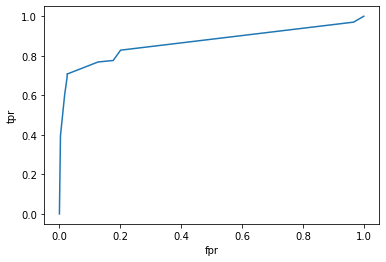

In [38]:
fpr, tpr, _ = roc_curve(ytest, pred)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

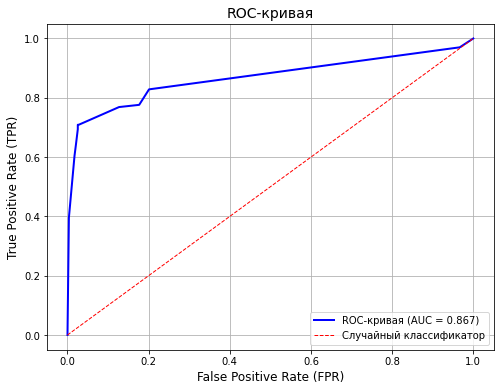

In [39]:
# Предсказанные вероятности положительного класса
pred_proba = dectree_proba  # или dectree_proba, если дерево

# ROC-кривая
fpr, tpr, thresholds = roc_curve(ytest, pred_proba)
roc_auc = roc_auc_score(ytest, pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='red', lw=1, linestyle='--', label='Случайный классификатор')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC-кривая', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [41]:
# ваш код здесь
from sklearn.metrics import roc_auc_score

# Предсказанные вероятности положительного класса
# для SVC
svc_proba = best_svc_model.predict_proba(X_test_norm)[:, 1]

# для DecisionTree
dectree_proba = best_dectree_model.predict_proba(X_test_norm)[:, 1]

# Вычисляем ROC-AUC для каждой модели
roc_auc_svc = roc_auc_score(ytest, svc_proba)
roc_auc_dectree = roc_auc_score(ytest, dectree_proba)

# Разность ROC-AUC
roc_auc_diff = roc_auc_dectree - roc_auc_svc

print(f"ROC-AUC DecisionTree: {roc_auc_dectree:.3f}")
print(f"ROC-AUC SVC: {roc_auc_svc:.3f}")
print(f"Разность ROC-AUC (DecisionTree - SVC): {roc_auc_diff:.3f}")


ROC-AUC DecisionTree: 0.867
ROC-AUC SVC: 0.827
Разность ROC-AUC (DecisionTree - SVC): 0.040


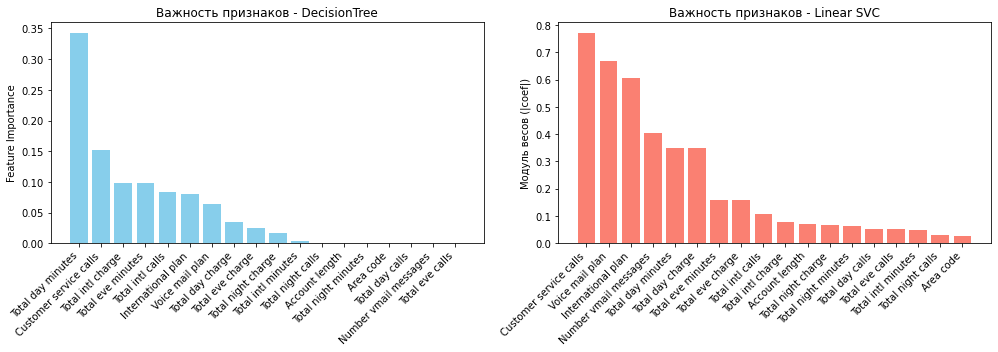

Топ-3 признака DecisionTree: ['Total day minutes', 'Customer service calls', 'Total intl charge']
Топ-3 признака Linear SVC: ['Customer service calls', 'Voice mail plan', 'International plan']


In [36]:
# ваш код здесь
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Список названий признаков
feature_names = X_train_norm.columns if hasattr(X_train_norm, 'columns') else [f'X{i}' for i in range(X_train_norm.shape[1])]

# ===== DecisionTree =====
dectree_importance = best_dectree_model.feature_importances_
dectree_df = pd.DataFrame({'feature': feature_names, 'importance': dectree_importance})
dectree_df = dectree_df.sort_values(by='importance', ascending=False)

# ===== Linear SVC =====
svc_importance = np.abs(best_svc_model.coef_).flatten()
svc_df = pd.DataFrame({'feature': feature_names, 'importance': svc_importance})
svc_df = svc_df.sort_values(by='importance', ascending=False)

# ===== Гистограммы =====
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.bar(dectree_df['feature'], dectree_df['importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Важность признаков - DecisionTree')
plt.ylabel('Feature Importance')

plt.subplot(1,2,2)
plt.bar(svc_df['feature'], svc_df['importance'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('Важность признаков - Linear SVC')
plt.ylabel('Модуль весов (|coef|)')

plt.tight_layout()
plt.show()

# ===== Топ-3 признака =====
top3_dectree = dectree_df['feature'].head(3).tolist()
top3_svc = svc_df['feature'].head(3).tolist()

print("Топ-3 признака DecisionTree:", top3_dectree)
print("Топ-3 признака Linear SVC:", top3_svc)


Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?

2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

**Выводы**:
1. Классы имеют сильный дисбаланс 15% на 85%
2. Решающее дерево  после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc
3. Только один признак (Customer service calls) совпадает в обеих моделях. Дерево уделяет больше внимание количественным (например, минуты и расходы). Линейная модель SVC больше придает важность бинарным признакам - наличие плана и так далее